In [5]:
#导入相关库函数
from matplotlib.image import imread
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#加载图片ladybug.png
image = imread('data\ladybug.png')
#将图像矩阵转换为3列的形式表示
X = image.reshape(-1,3)
print(X.shape)


(426400, 3)


In [7]:
#建立kmeans模型，指定簇的数目k=8
kmeans = KMeans(n_clusters = 8,random_state=42).fit(X)
#输出簇的中心点
kmeans.cluster_centers_


array([[0.98326355, 0.9351094 , 0.02573261],
       [0.02240384, 0.11051449, 0.00579273],
       [0.21762744, 0.38532948, 0.0572455 ],
       [0.7599995 , 0.20910062, 0.04433527],
       [0.09915568, 0.25297862, 0.01673489],
       [0.6116277 , 0.6297308 , 0.38689855],
       [0.37087163, 0.52249783, 0.156312  ],
       [0.8831067 , 0.72412664, 0.03478576]], dtype=float32)

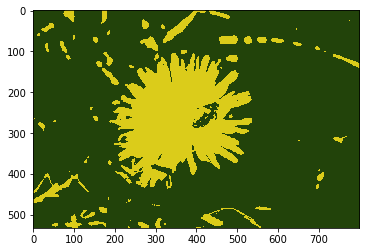

In [10]:
#将所有样本点的值都替换为所在簇的质心点值
#矩阵转换为533*800*3，并赋值给图像矩阵segmented_img 
segmented_img = kmeans.cluster_centers_[kmeans.labels_].reshape(533, 800, 3)
#输出图像
plt.imshow(segmented_img)


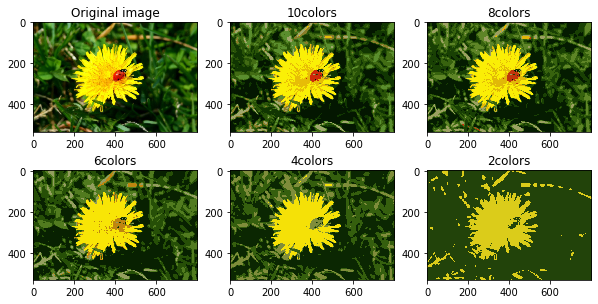

In [9]:

#新建列表segmented_imgs
segmented_imgs = []
K = (10,8,6,4,2)
for n_cluster in K:
    #取不同的K值，建立相应的kmeans模型
    kmeans = KMeans(n_clusters = n_cluster,random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    #聚类结果添加到列表segmented_imgs
    segmented_imgs.append(segmented_img.reshape(image.shape))
plt.figure(figsize=(10,5))
plt.subplot(231)
plt.imshow(image)
plt.title('Original image')
for idx,n_clusters in enumerate(K):
    #显示列表中的各个图像
    plt.subplot(232+idx)
    plt.imshow(segmented_imgs[idx])
    plt.title('{}colors'.format(n_clusters))